Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


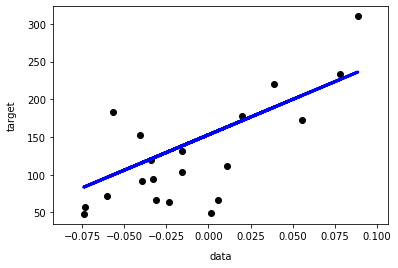

In [96]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2] 
# Split the data into training/testing sets. Here, feature X is blood pressure.
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets. Here, target y is "a quantitative measure of disease progression"
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks()
plt.yticks()
plt.xlabel("data", labelpad=10)
plt.ylabel("target", labelpad=10)

plt.show()

To get an optimal w:

$$f(x) = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_D x_D
= 
\begin{bmatrix}
1 & x_1 & x_2 & \cdots & x_D
\end{bmatrix}
\begin{bmatrix}
w_0 \\ w_1 \\ w_2 \\ \vdots \\ w_D
\end{bmatrix}
= x_a^T w_a$$

$$w^{\ast} = (X^TX)^{-1} X^T y$$

R2 Score:
$$R^2 = 1 - SS_r/SS_t$$
$$SS_t =\sum_{m}^{i=1}(y^i-ŷ)^2$$
$$SS_r =\sum_{m}^{i=1}(h(x^i)-y^i)^2$$

Coefficients: 
 938.2378612512634
Mean squared error: 2548.07
Variance score: 0.47


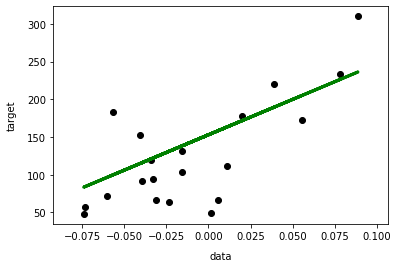

In [135]:
X_train_aug = np.hstack([np.ones((diabetes_X_train.shape[0], 1)), diabetes_X_train])
w = np.linalg.inv(X_train_aug.T @ X_train_aug) @ X_train_aug.T @ diabetes_y_train

X_test_aug = np.hstack([np.ones((diabetes_X_test.shape[0], 1)), diabetes_X_test])
pred_y = np.dot(X_test_aug, w)

# The coefficients
print('Coefficients: \n', w[1])
print("Mean squared error: %.2f"
      % np.square(diabetes_y_test - pred_y).mean())
np_r2_score = 1 - (np.sum(np.square(pred_y - diabetes_y_test))/ np.sum(np.square(diabetes_y_test - np.mean(diabetes_y_test))))
print('Variance score: %.2f' % np_r2_score)

plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, pred_y, color='green', linewidth=3)

plt.xlabel("data", labelpad=10)
plt.ylabel("target", labelpad=10)

plt.show()